<a href="https://colab.research.google.com/github/rituy-mahajan/HelloWorld/blob/main/Task2LGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LGM VIRTUAL INTERNSHIP**


**Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM**

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Importing the important Libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import mean_squared_error
%matplotlib inline

read the csv file

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


(rows,column)

In [ ]:
df.shape

(2035, 8)

In [ ]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [ ]:
df=df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

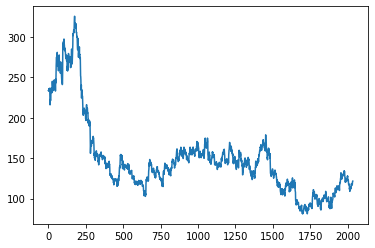

In [ ]:
plt.plot(df)

drawing histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4801aa7290>,
      dtype=object)

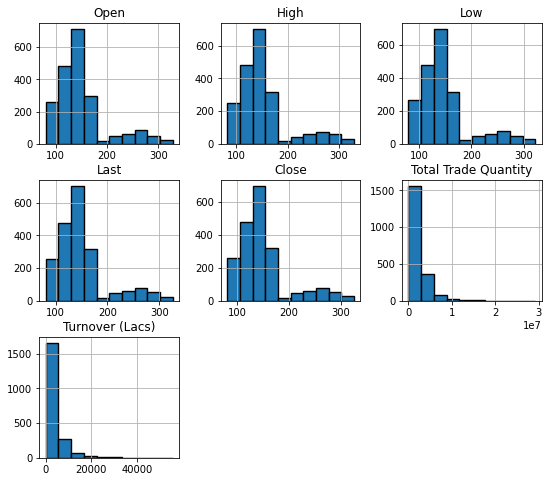

In [ ]:
data.hist(edgecolor='black',linewidth=1.4,figsize=(9,8))

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


split data into train and test data sets

In [ ]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
training_size,test_size

(1526, 509)

In [ ]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

rearrange the data sets

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 64, verbose = 1)

Epoch 1/10
23/23 [==============================] - 16s 376ms/step - loss: 0.0273 - val_loss: 0.0090
Epoch 2/10
23/23 [==============================] - 8s 342ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 3/10
23/23 [==============================] - 8s 342ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/10
23/23 [==============================] - 8s 340ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/10
23/23 [==============================] - 8s 340ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 6/10
23/23 [==============================] - 8s 340ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/10
23/23 [==============================] - 8s 338ms/step - loss: 0.0011 - val_loss: 9.4910e-04
Epoch 8/10
23/23 [==============================] - 8s 339ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/10
23/23 [==============================] - 8s 340ms/step - loss: 9.7350e-04 - val_loss: 9.6397e-04
Epoch 10/10
23/23 [==============================] - 8s 341ms/step - loss: 0.0010 - val

In [ ]:
len(test_data)

509

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.06801470588235292,
 0.0667892156862745,
 0.07414215686274506,
 0.0716911764705882,
 0.08639705882352938,
 0.08312908496732024,
 0.06311274509803921,
 0.06290849673202609,
 0.05167483660130712,
 0.031862745098039214,
 0.04003267973856206,
 0.03860294117647056,
 0.041053921568627416,
 0.033905228758169925,
 0.031249999999999944,
 0.026348039215686292,
 0.05861928104575159,
 0.06311274509803921,
 0.06209150326797386,
 0.055351307189542454,
 0.08455882352941174,
 0.05514705882352938,
 0.06045751633986923,
 0.055759803921568596,
 0.04391339869281047,
 0.029207516339869233,
 0.028186274509803877,
 0.04718137254901961,
 0.06045751633986923,
 0.05861928104575159,
 0.06168300653594766,
 0.06699346405228751,
 0.07087418300653592,
 0.07557189542483661,
 0.07700163398692805,
 0.10375816993464049,
 0.10314542483660127,
 0.10334967320261434,
 0.10089869281045749,
 0.1043709150326797,
 0.0980392156862745,
 0.09722222222222221,
 0.09783496732026142,
 0.09579248366013071,
 0.09109477124183002,
 0.09

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

mean square error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

160.52957362465418

Mean Square Error

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

107.72222210283755

mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE : ",mean_absolute_error(y_test,test_predict))

MAE :  107.18694129314665


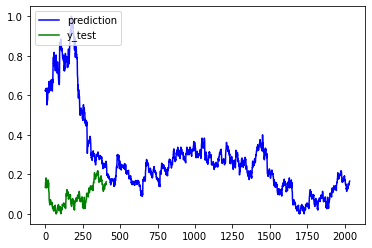

In [ ]:
plt.plot(df,color='blue', label='prediction')
plt.plot(y_test,color='green', label='y_test')
plt.legend(loc='upper left')
plt.show()